In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,NaN,1.6,2.0,0.0,7.0
2,1,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64.0,4.0,128.0,263.0,0.0,0.0,NaN,1.0,0.2,2.0,1.0,7.0
4,0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	7
float64		column 3	14
float64		column 4	21
float64		column 5	7
float64		column 6	7
float64		column 7	7
float64		column 8	29
float64		column 9	8
float64		column 10	14
float64		column 11	15
float64		column 12	14
float64		column 13	28


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,270.000000,263.000000,256.000000,249.000000,263.000000,263.000000,263.000000,241.000000,262.000000,256.000000,255.000000,256.000000,242.000000
mean,0.677778,54.452471,3.187500,131.843373,250.330798,0.152091,1.011407,150.145228,0.324427,1.055469,1.572549,0.664062,4.694215
std,0.468195,9.127418,0.943502,17.308269,51.493504,0.359794,0.998024,22.555110,0.469057,1.140128,0.609659,0.935382,1.936087
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.500000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,279.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

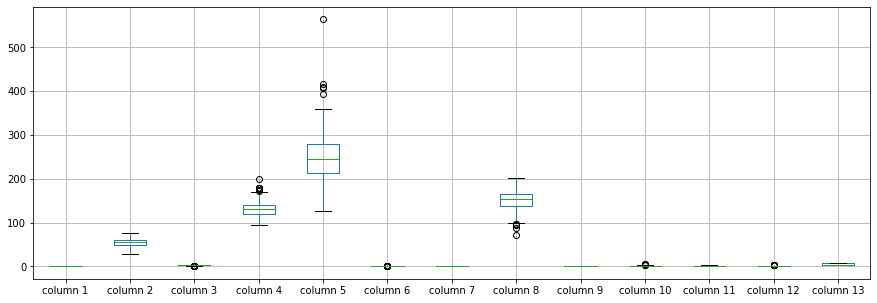

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677778
column 2      54.452471
column 3       3.187500
column 4     131.843373
column 5     250.330798
column 6       0.152091
column 7       1.011407
column 8     150.145228
column 9       0.324427
column 10      1.055469
column 11      1.572549
column 12      0.664062
column 13      4.694215
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.089937,0.038896,-0.110701,-0.226605,0.036989,0.048720,-0.084491,0.161617,0.095599,0.025056,0.063622,0.372145
column 2,-0.089937,1.000000,0.091469,0.287847,0.221144,0.135227,0.135713,-0.410032,0.112800,0.162472,0.172244,0.350845,0.131927
column 3,0.038896,0.091469,1.000000,-0.054710,0.064850,-0.116659,0.061128,-0.312401,0.363168,0.171462,0.155233,0.216797,0.260029
column 4,-0.110701,0.287847,-0.054710,1.000000,0.159334,0.148069,0.105560,-0.079695,0.149471,0.241541,0.204426,0.078593,0.104696
column 5,-0.226605,0.221144,0.064850,0.159334,1.000000,0.013838,0.132931,-0.024713,0.107524,0.022287,0.000414,0.098606,-0.001796
column 6,0.036989,0.135227,-0.116659,0.148069,0.013838,1.000000,0.046038,-0.010678,-0.005178,-0.038083,0.028981,0.141931,0.039177
column 7,0.048720,0.135713,0.061128,0.105560,0.132931,0.046038,1.000000,-0.072137,0.132619,0.121427,0.183385,0.092721,0.053001
column 8,-0.084491,-0.410032,-0.312401,-0.079695,-0.024713,-0.010678,-0.072137,1.000000,-0.365457,-0.349431,-0.392807,-0.242096,-0.253346
column 9,0.161617,0.112800,0.363168,0.149471,0.107524,-0.005178,0.132619,-0.365457,1.000000,0.239728,0.263778,0.139556,0.324661
column 10,0.095599,0.162472,0.171462,0.241541,0.022287,-0.038083,0.121427,-0.349431,0.239728,1.000000,0.619206,0.231162,0.344200


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+23,13+23+23,13+23+23+23,13+23+23+23+23,13+23+23+23+23+23,13+23+23+23+23,13+23+23+23,13+23+23,13+23,13], vae_layer = False, seed = 23)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 573.4076156616211
Epoch: 1 , loss: 574.8622932434082
Epoch: 2 , loss: 576.2429695129395
Epoch: 3 , loss: 576.272590637207
Epoch: 4 , loss: 574.8192443847656
Epoch: 5 , loss: 576.9764938354492
Epoch: 6 , loss: 572.434944152832
Epoch: 7 , loss: 575.3348083496094
Epoch: 8 , loss: 574.8636703491211
Epoch: 9 , loss: 574.5792007446289
Epoch: 10 , loss: 576.7709808349609
Epoch: 11 , loss: 573.2556037902832
Epoch: 12 , loss: 573.1725273132324
Epoch: 13 , loss: 576.4731674194336
Epoch: 14 , loss: 572.6105651855469
Epoch: 15 , loss: 575.1322212219238
Epoch: 16 , loss: 575.1993808746338
Epoch: 17 , loss: 575.4313468933105
Epoch: 18 , loss: 575.6291770935059
Epoch: 19 , loss: 575.2571258544922
Epoch: 20 , loss: 573.988956451416
Epoch: 21 , loss: 574.2338676452637
Epoch: 22 , loss: 574.6518745422363
Epoch: 23 , loss: 576.0953216552734
Epoch: 24 , loss: 574.585880279541
Epoch: 25 , loss: 575.747953414917
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       0.098857
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.051348,0.0,0.0,0.0,0.000000
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-104.93714,0.000000,0.0,0.0,0.0,0.000000
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,-2.916431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
266,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
267,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
268,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1171.0702935381448, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.21627402486618386

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70.0,4.0,130.0,322.0,0.0,2.0,109.00000,0.000000,2.4,2.0,3.0,3.000000
1,0,67.0,3.0,115.0,564.0,0.0,2.0,160.00000,0.051348,1.6,2.0,0.0,7.000000
2,1,57.0,2.0,124.0,261.0,0.0,0.0,141.00000,0.000000,0.3,1.0,0.0,7.000000
3,1,64.0,4.0,128.0,263.0,0.0,0.0,0.06286,1.000000,0.2,2.0,1.0,7.000000
4,0,74.0,2.0,120.0,269.0,0.0,2.0,121.00000,1.000000,0.2,1.0,1.0,0.083569
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52.0,3.0,172.0,199.0,1.0,0.0,162.00000,0.000000,0.5,1.0,0.0,7.000000
266,1,44.0,2.0,120.0,263.0,0.0,0.0,173.00000,0.000000,0.0,1.0,0.0,7.000000
267,0,56.0,2.0,140.0,294.0,0.0,2.0,153.00000,0.000000,1.3,2.0,0.0,3.000000
268,1,57.0,4.0,140.0,192.0,0.0,0.0,148.00000,0.000000,0.4,2.0,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_NL_5(imp).xlsx", index=False, header=False)